# WH AN Plots

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import warnings
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 70
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [17]:
# parameters
AN_label = "/home/submit/"+os.environ['USER']+"/SUEP/AN-23-183/images/{}.pdf"
save_to_AN = True  # control whether to save to AN directory

In [26]:
hist_dir = '/ceph/submit/data/user/l/lavezzo/SUEP/outputs/'

files = []
files += getHistLists(hist_dir, "dataMCtest", "../filelist/WH/list_2018_Data_WH.txt", file_ext=".pkl")

files_vrgj = []
files_vrgj += getHistLists(hist_dir, "VRGJtest_newNtuples", "../test.txt", file_ext=".pkl")
files_vrgj = [f for f in files_vrgj if ("QCD_Pt_15to30" not in f) and ("QCD_Pt_30to50" not in f) and ("QCD_Pt_50to80" not in f)]

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL",
    "tt",
    "WJetsToLNu_Pt",
    "WJetsToLNu_incl"
]
bkgs_vrgj = [
    'VGammaToJJGamma',
    'QCD_HT',
    'GJets',
]
data = [
    "SingleMuon",
    "EGamma"
]
data_vrgj = [
    "EGamma"
]

In [32]:
plots = loader(files, by_bin=True, by_year=True, verbose=True, load_cutflows=True)
plots_vrgj = loader(files_vrgj, by_bin=True, by_year=True, verbose=True, load_cutflows=True)

# plots = combineSamples(plots, samples=bkgs, new_tag='MC')
plots = combineSamples(plots, samples=[s+"_2018" for s in data], new_tag='data_2018')

#plots_vrgj = combineSamples(plots_vrgj, samples=bkgs_vrgj, new_tag='MC-QCDpT-VRGJ')
plots_vrgj = combineSamples(plots_vrgj, samples=[s+"_2018" for s in data_vrgj], new_tag='data-VRGJ_2018')

Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/EGamma+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_dataMCtest.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018A
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/EGamma+Run2018B-UL2018_MiniAODv2-v1+MINIAOD_dataMCtest.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018B
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/EGamma+Run2018C-UL2018_MiniAODv2-v1+MINIAOD_dataMCtest.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018C
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/EGamma+Run2018D-UL2018_MiniAODv2-v2+MINIAOD_dataMCtest.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018D
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/SingleMuon+Run2018A-UL2018_MiniAODv2-v3+MINIAOD_dataMCtest.pkl
	Found era 2018
	Found sample SingleMuon
	Found bin SingleMuon+Run2018A
	Fi

# 6. Event Selection

## 6.1 Signal Region

## 6.2 CRWJ

## 6.3 VRGJ

In [22]:
# mapping between plotting tags and the text we want to show in the top right of each figure to denote which region we are in
region_labels = {
    "VRGJlowSOVERLAP": "VRGJ - Low S",
}

Gamma + jets histograms with data and MC for each year.

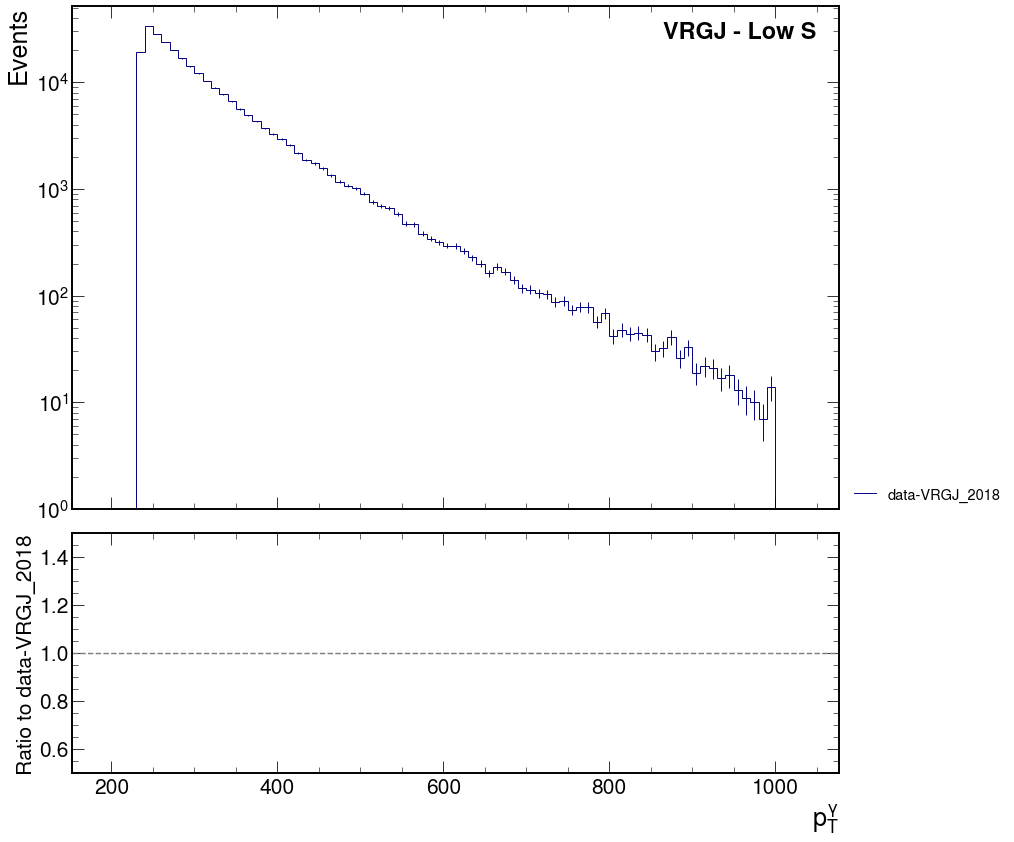

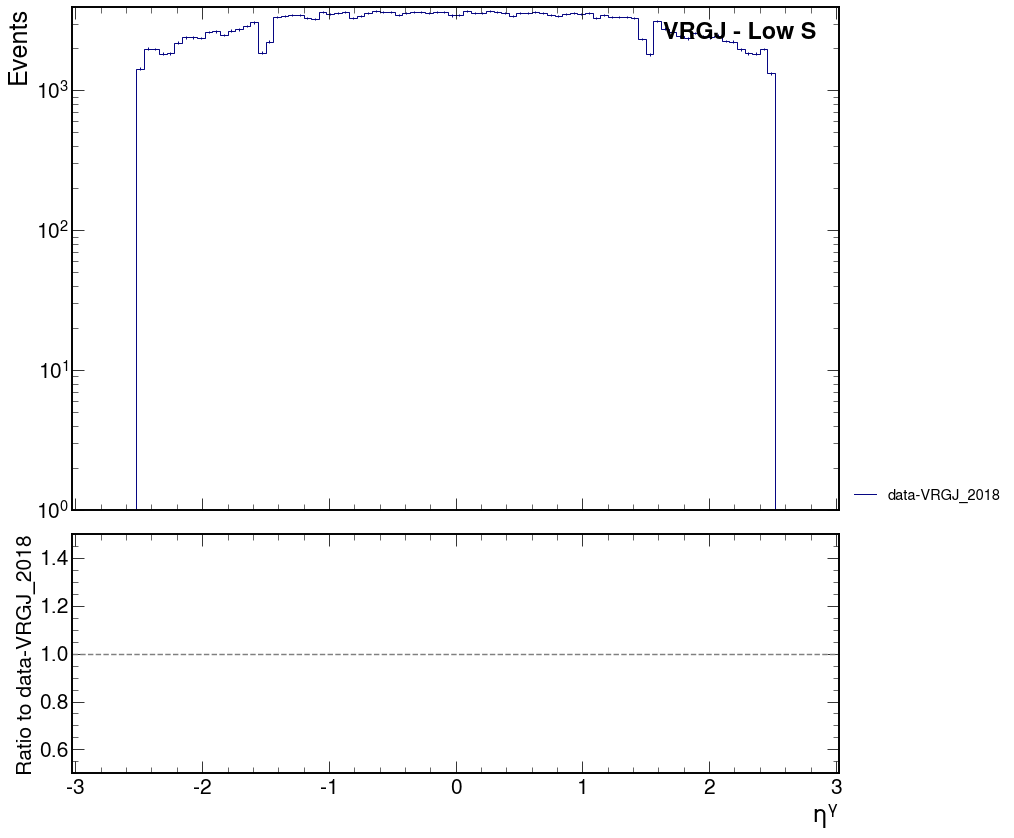

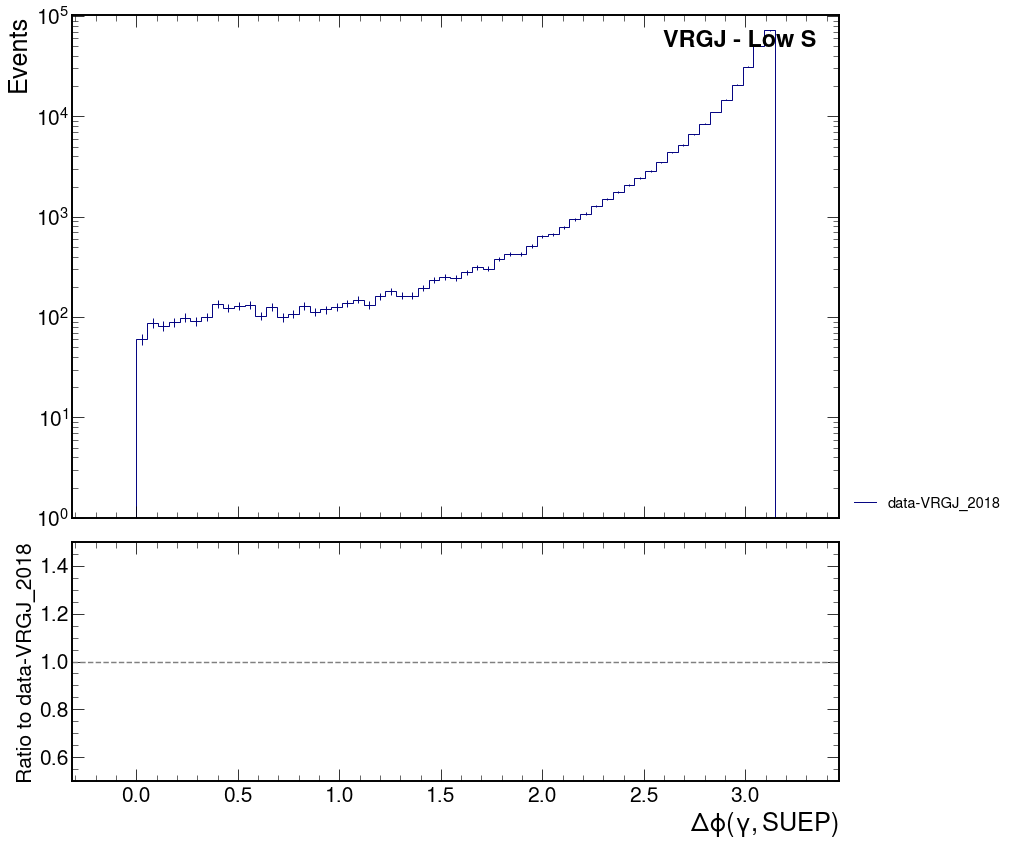

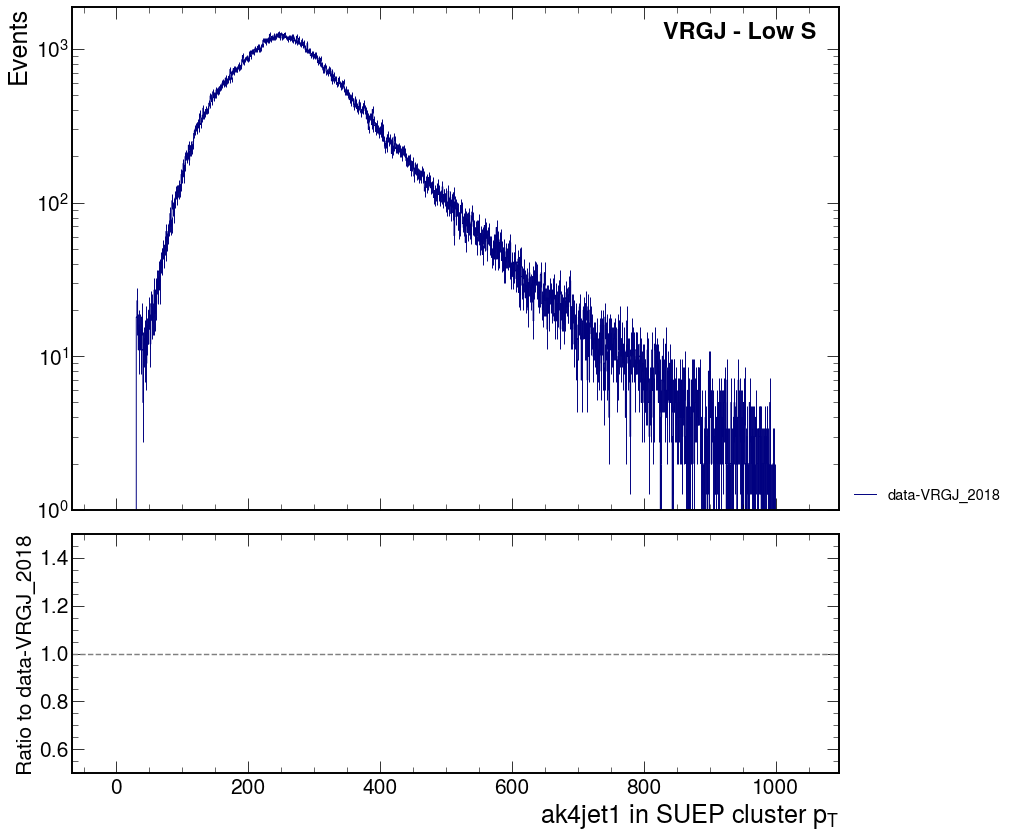

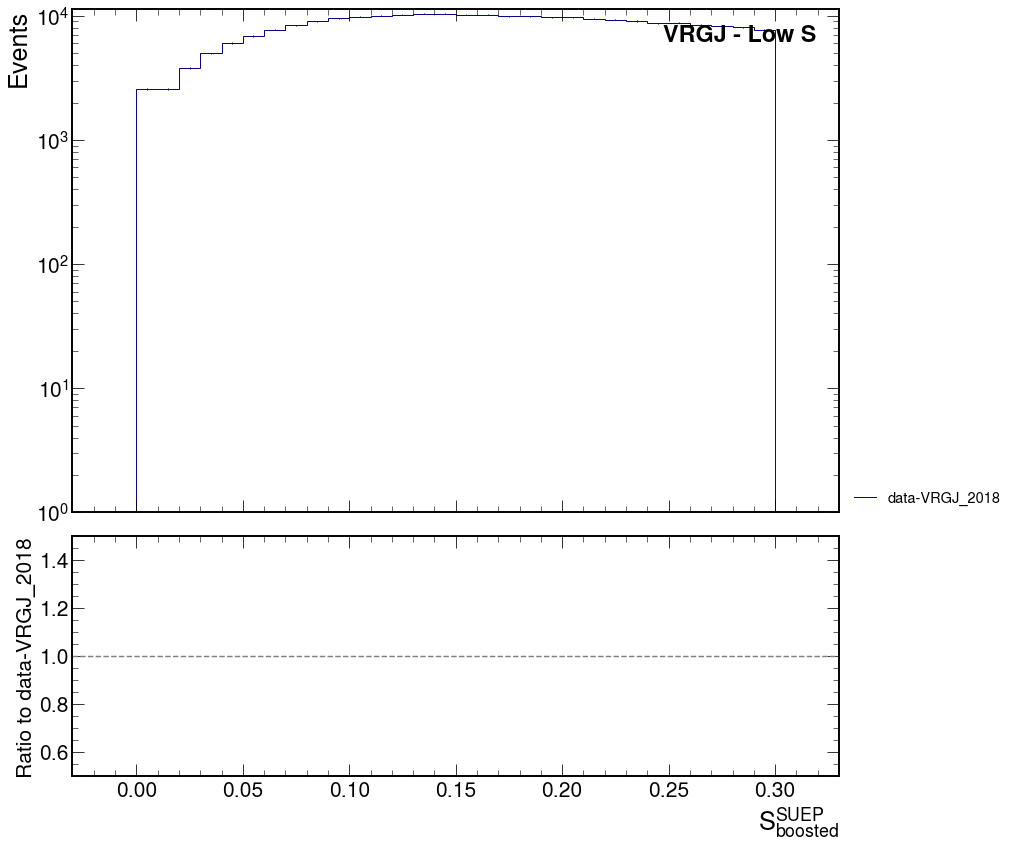

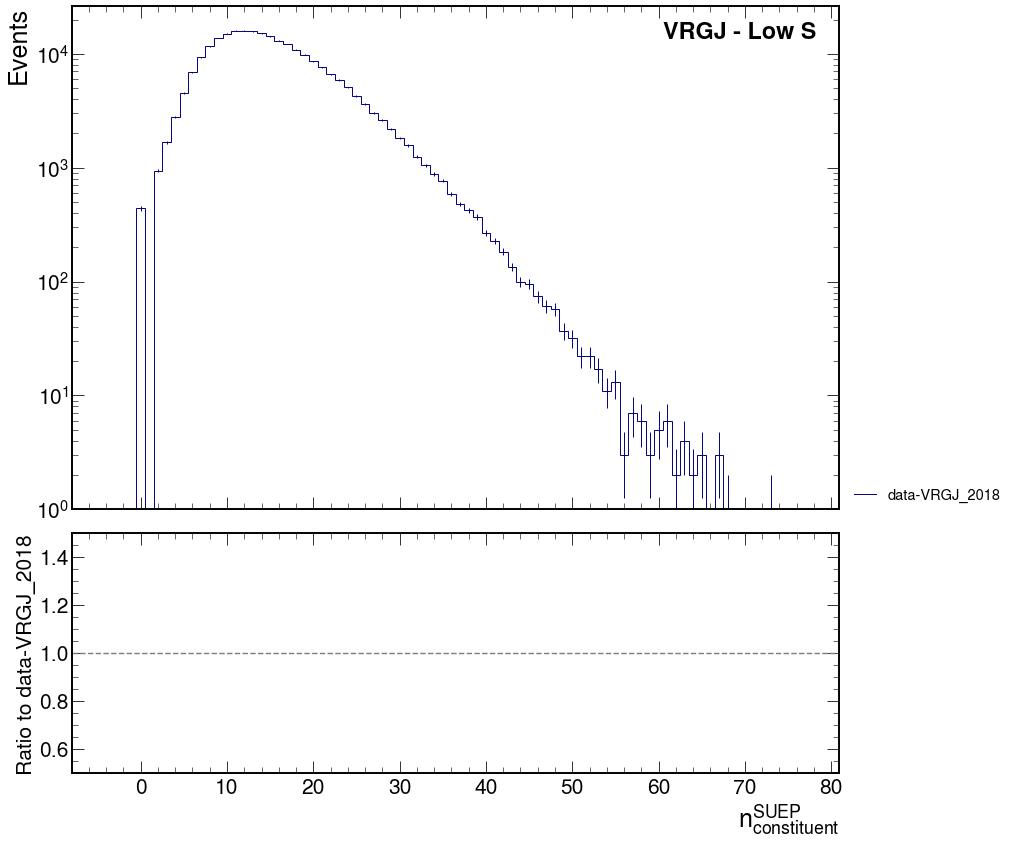

In [36]:
years = ['2018']
plot_tags = [
    "VRGJlowSOVERLAP"
]
plot_labels =  [
    "photon_pt",
    "photon_eta",
    "deltaPhi_SUEP_photon",
    "ak4jet1_inSUEPcluster_pt",
    "SUEP_S1",
    "SUEP_nconst"
]
samples = ['data-VRGJ_2018']
stacked_samples = [] #bkgs

for year in years:

    for tag in plot_tags:

            for plot_label in plot_labels:
                  
                hlist = [plots_vrgj[sample][plot_label+"_"+tag] for sample in samples]
                stacked_hlist = [plots_vrgj[sample][plot_label+"_"+tag] for sample in stacked_samples]
                #hlist = [plots_vrgj[sample][plot_label][100j:10000j:sum,:] for sample in samples]
                #stacked_hlist = [plots_vrgj[sample][plot_label][100j:10000j:sum,:] for sample in stacked_samples]

                fig, axs = styled_plot_ratio(hlist, samples, stacked_hlist=stacked_hlist, stacked_labels=stacked_samples, density=False)
                axs[1].set_ylim(0.5, 1.5)
                #axs[0].set_xlim(20, 200)
                #axs[0].set_yscale('linear')

                axs[0].text(0.97, 0.97, region_labels.get(tag, None),
                transform=axs[0].transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')

                if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}_{tag}_{year}"), bbox_inches='tight')
                fig.show()

Comparison of CRWJ and VRGJlowS

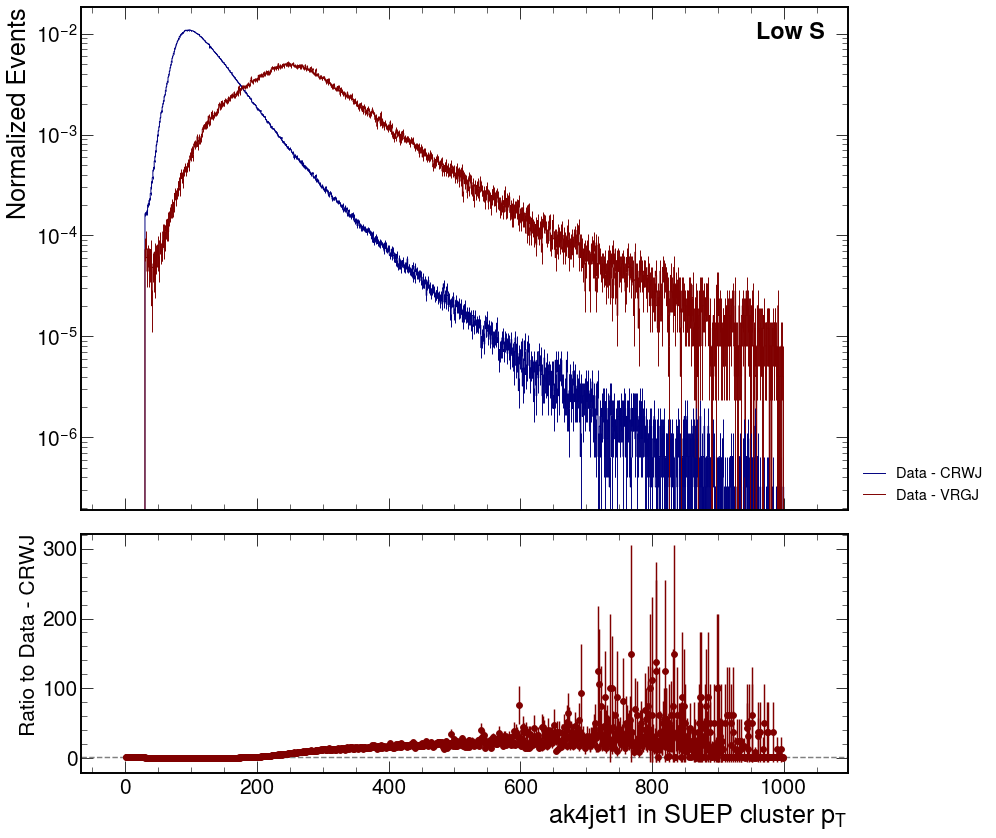

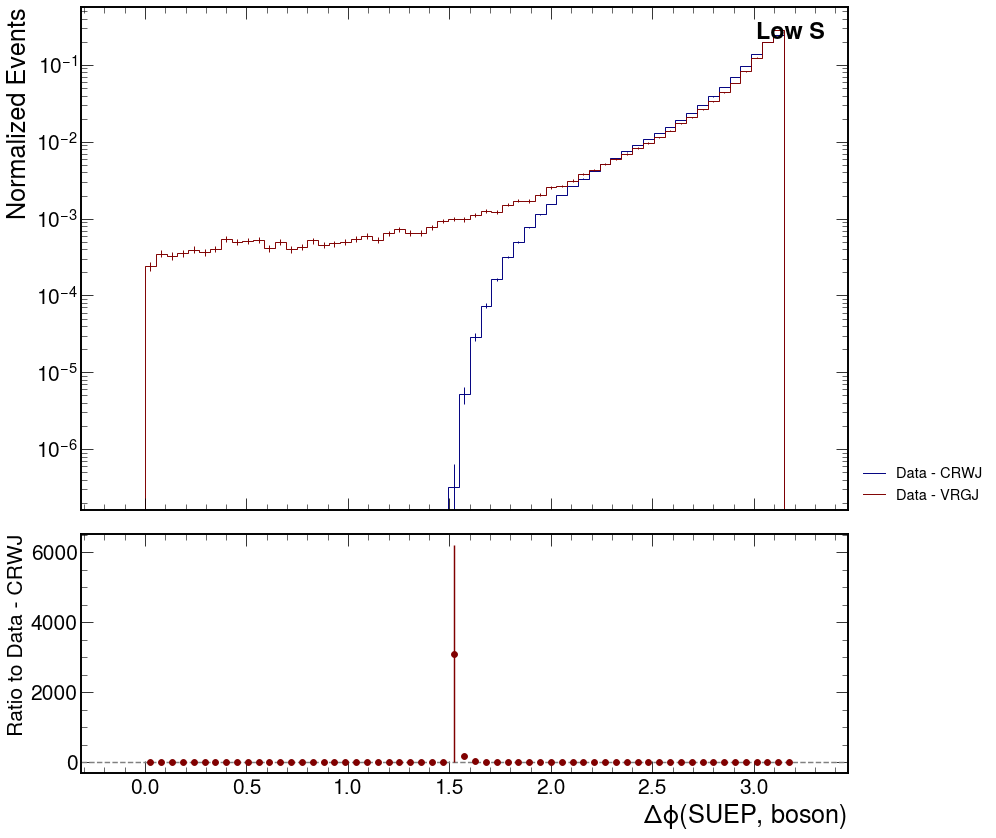

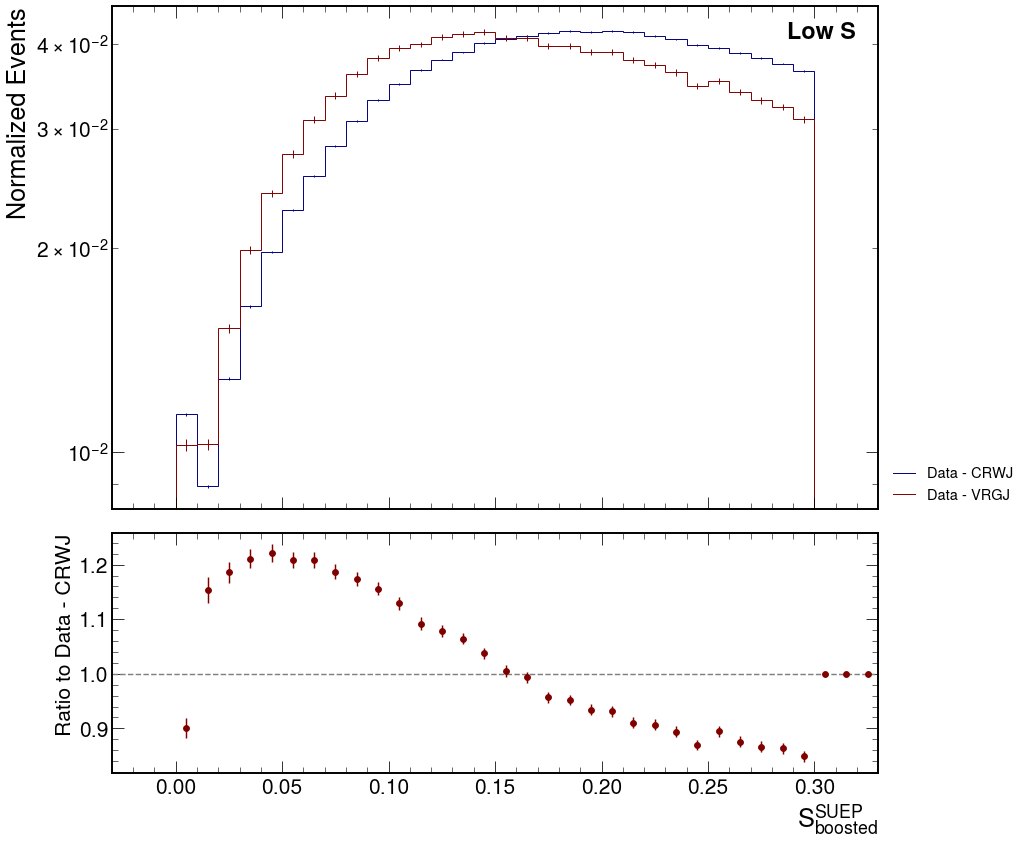

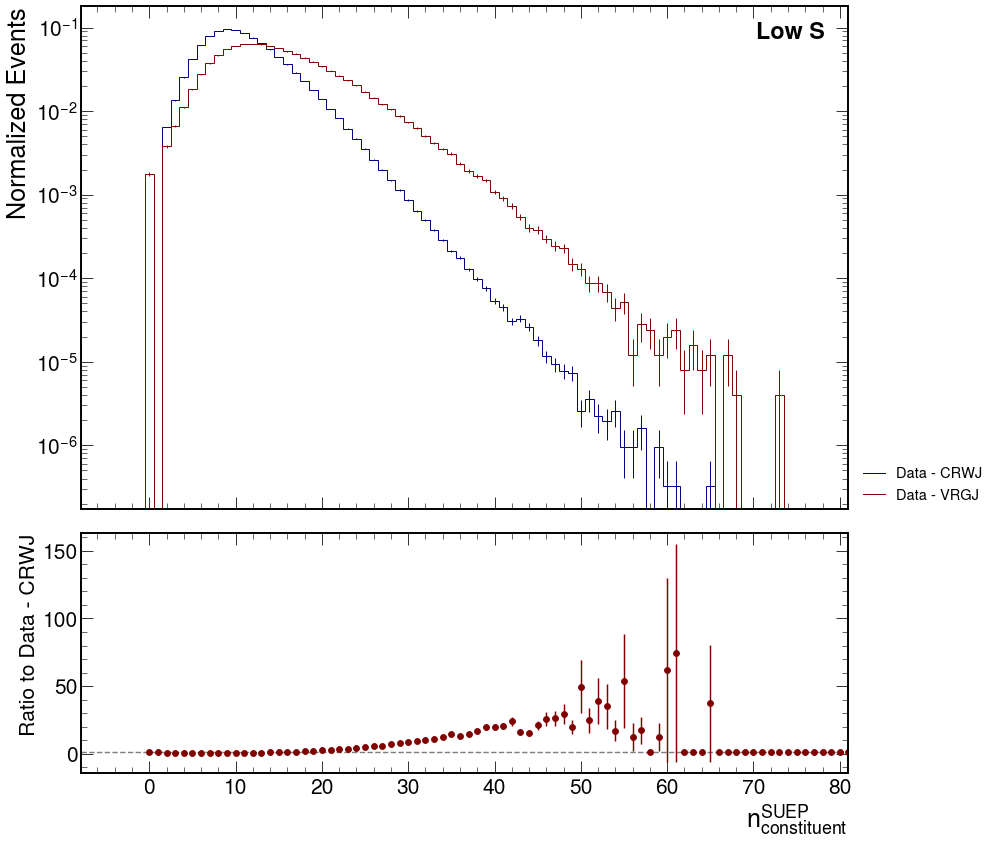

In [50]:
plot_labels = [
    ["ak4jet1_inSUEPcluster_pt_CRWJ", "ak4jet1_inSUEPcluster_pt_VRGJlowSOVERLAP"],
    ['deltaPhi_SUEP_W_CRWJ', 'deltaPhi_SUEP_photon_VRGJlowSOVERLAP'],
    ['SUEP_S1_CRWJ', 'SUEP_S1_VRGJlowSOVERLAP'],
    ['SUEP_nconst_CRWJ', 'SUEP_nconst_VRGJlowSOVERLAP'],
]    
for pair in plot_labels:

    hwjets = plots['data_2018'][pair[0]].copy()
    hgjets = plots_vrgj['data-VRGJ_2018'][pair[1]].copy()

    if len(hwjets.axes[0]) != len(hgjets.axes[0]):
        ub = min(hwjets.axes[0].edges[-1], hgjets.axes[0].edges[-1]) * 1.0j
        hwjets = hwjets[:ub]
        hgjets = hgjets[:ub]
        lb = max(hwjets.axes[0].edges[0], hgjets.axes[0].edges[0]) * 1.0j
        hwjets = hwjets[lb:]
        hgjets = hgjets[lb:]

        if len(hwjets.axes[0]) < len(hgjets.axes[0]):
            hgjets = rebin_piecewise(hgjets, hwjets.axes[0].edges)
        elif len(hwjets.axes[0]) > len(hgjets.axes[0]):
            hwjets = rebin_piecewise(hwjets, hgjets.axes[0].edges)

    fig, axs = styled_plot_ratio([hwjets, hgjets], labels=["Data - CRWJ", "Data - VRGJ"], density=True)
    xlabel = hwjets.axes[0].label.replace("W", "boson")
    axs[1].set_xlabel(xlabel)
    axs[0].text(0.97, 0.97, "Low S",
    transform=axs[0].transAxes, 
    fontsize=24, fontweight='bold', va='top', ha='right')

    out_label = pair[0].replace("_W_", "_boson_").replace("_CRWJ", "")
    if save_to_AN: fig.savefig(AN_label.format(f"{out_label}_CRWJVRGJlowS_2018"), bbox_inches='tight')
    
    fig.show()
